Code crashes on first time step with flow too fast at Western Boundary.  Tried to exactly match the ssh forcing by rerunning May 19 with obs.  Still failed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

## Nov 19 restart file

In [2]:
restart19 = xr.open_dataset('/results/SalishSea/nowcast-dev.201806/19may19/SalishSea_03738960_restart.nc')
restart19

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    kt            float64 ...
    ndastp        float64 ...
    adatrj        float64 ...
    ssh_ibb       (t, y, x) float64 ...
    rnf_b         (t, y, x) float64 ...
    rnf_hc_b      (t, y, x) float64 ...
    rnf_sc_b      (t, y, x) float64 ...
    utau_b        (t, y, x) float64 ...
    vtau_b        (t, y, x) float64 ...
    qns_b         (t, y, x) float64 ...
    emp_b         (t, y, x) float64 ...
    sfx_b         (t, y, x) float64 ...
    en            (t, z, y, x) float64 ...
    avt           (t, z, y, x) float64 ...
    avm           (t, z, y, x) float64 ...
    avmu          (t, z, y, x) float64 ...
    avmv          (t, z, y, x) float64 ...
    mxln          (t, z, y, x) float64 ...
    ub2_b         (t, y, x

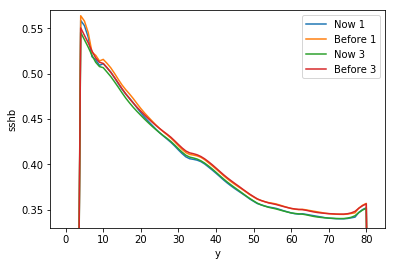

In [3]:
ib, ie = 385, 467
sshn19 = restart19.sshn[0]
sshb19 = restart19.sshb[0]
sshn19[ib:ie, 1].plot(label="Now 1")
sshb19[ib:ie, 1].plot(label="Before 1")
sshn19[ib:ie, 3].plot(label="Now 3")
sshb19[ib:ie, 3].plot(label="Before 3")
plt.ylim(0.33, 0.57)
plt.legend();

At the north end, we see a significant difference between the values Before (orange and red) and the values Now (blue and green) but little difference between grid point 1 and 3  
At the south end we see significant differences between the grid points and less differenc between the time steps.

## Abort File from 20th

In [4]:
abort20 = xr.open_dataset('/results/SalishSea/nowcast-dev.201806/20may19/output.abort.nc')
abort20

<xarray.Dataset>
Dimensions:       (deptht: 40, time_counter: 1, x: 398, y: 898)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5000003 1.5000031 ... 414.5341 441.4661
  * time_counter  (time_counter) datetime64[ns] 2019-05-20T00:00:40
Dimensions without coordinates: x, y
Data variables:
    vosaline      (time_counter, deptht, y, x) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    vozocrtx      (time_counter, deptht, y, x) float32 ...
    vomecrty      (time_counter, deptht, y, x) float32 ...
    vovecrtz      (time_counter, deptht, y, x) float32 ...
    sowaflup      (time_counter, y, x) float32 ...
    sohefldo      (time_counter, y, x) float32 ...
    soshfldo      (time_counter, y, x) float32 ...
    soicecov      (time_counter, y, x) float32 ...
    sozotaux      (time_counter, y, x) float32 ...
    sometauy      (time_counter, 

In fortran, the bad point is at 2, 392, which in python is 1, 391

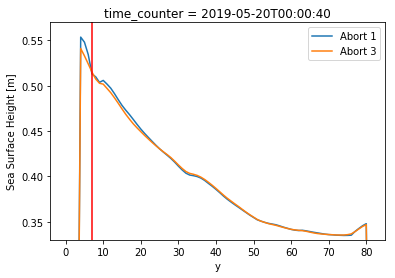

In [5]:
ssh20 = abort20.sossheig[0]
ssh20[ib:ie, 1].plot(label="Abort 1")
ssh20[ib:ie, 3].plot(label="Abort 3")
plt.ylim(0.33, 0.57)
plt.plot([392-ib, 392-ib], [0.33, 0.57], color='r')
plt.legend();

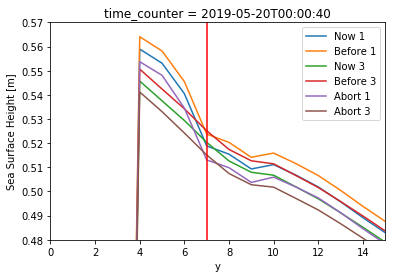

In [6]:
sshn19[ib:ie, 1].plot(label="Now 1")
sshb19[ib:ie, 1].plot(label="Before 1")
sshn19[ib:ie, 3].plot(label="Now 3")
sshb19[ib:ie, 3].plot(label="Before 3")
ssh20[ib:ie, 1].plot(label="Abort 1")
ssh20[ib:ie, 3].plot(label="Abort 3")
plt.ylim(0.48, 0.57)
plt.xlim(0, 15)
plt.plot([392-ib, 392-ib], [0.33, 0.57], color='r')
plt.legend();

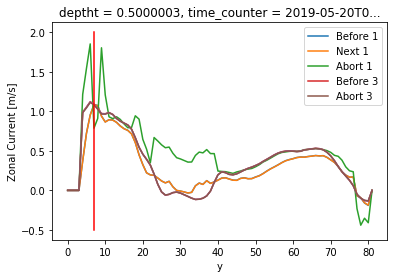

In [7]:
uveln19 = restart19.un[0, 0]
uvelb19 = restart19.ub[0, 0]
uvel20 = abort20.vozocrtx[0, 0]
uvelb19[ib:ie, 1].plot(label="Before 1")
uveln19[ib:ie, 1].plot(label="Next 1")
uvel20[ib:ie, 1].plot(label='Abort 1')
uvelb19[ib:ie, 3].plot(label="Before 3")
uveln19[ib:ie, 3].plot()
uvel20[ib:ie, 3].plot(label='Abort 3')
plt.plot([392-ib, 392-ib], [-0.5, 2], color='r')
plt.legend()

Wow, sea surface height is nice smooth progression but the velocity just goes nuts.

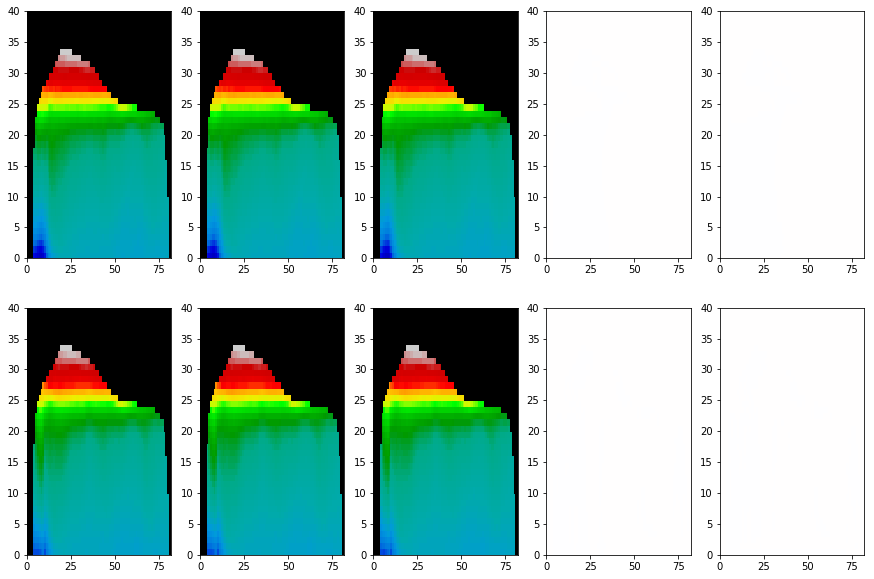

In [8]:
saln19 = restart19.sn[0]
salb19 = restart19.sb[0]
sal20 = abort20.vosaline[0]
delta_sal1 = np.array(sal20[0:40, ib:ie, 1]) - np.array(saln19[0:40, ib:ie, 1])
delta_sal3 = np.array(sal20[0:40, ib:ie, 3]) - np.array(saln19[0:40, ib:ie, 3])
fig, axs = plt.subplots(2, 5, figsize=(15, 10))
axs[0, 0].pcolormesh(salb19[:, ib:ie, 1], label="Before 1", vmin=31, cmap='nipy_spectral')
axs[0, 1].pcolormesh(saln19[:, ib:ie, 1], label="After 1", vmin=31, cmap='nipy_spectral')
axs[0, 2].pcolormesh(sal20[:, ib:ie, 1], label="Abort", vmin=31, cmap='nipy_spectral')
axs[0, 3].pcolormesh(saln19[:, ib:ie, 1]-salb19[:, ib:ie, 1], label="Diff 1", cmap='bwr', vmax=0.2, vmin=-0.2)
axs[0, 4].pcolormesh(delta_sal1, label="Diff 2", cmap='bwr', vmax=0.2, vmin=-0.2)
axs[1, 0].pcolormesh(salb19[:, ib:ie, 3], label="Before 3", vmin=31, cmap='nipy_spectral')
axs[1, 1].pcolormesh(saln19[:, ib:ie, 3], label="After 3", vmin=31, cmap='nipy_spectral')
axs[1, 2].pcolormesh(sal20[:, ib:ie, 3], label="Abort 3", vmin=31, cmap='nipy_spectral')
axs[1, 3].pcolormesh(saln19[:, ib:ie, 3]-salb19[:, ib:ie, 3], label="Diff 1 at 3", cmap='bwr', vmax=0.2, vmin=-0.2)
axs[1, 4].pcolormesh(delta_sal3, label="Diff 2 at 3", cmap='bwr', vmax=0.2, vmin=-0.2);


In this case the problem appears to be the live ocean file.

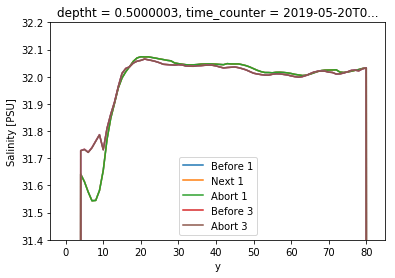

In [9]:
salb19[0, ib:ie, 1].plot(label="Before 1")
saln19[0, ib:ie, 1].plot(label="Next 1")
sal20[0, ib:ie, 1].plot(label='Abort 1')
salb19[0, ib:ie, 3].plot(label="Before 3")
saln19[0, ib:ie, 3].plot()
sal20[0, ib:ie, 3].plot(label='Abort 3')
plt.plot([392-ib, 392-ib], [-0.5, 2], color='r')
plt.ylim(31.4, 32.2)
plt.legend()

Now my salinity is all loverly, but no change in my velocities!

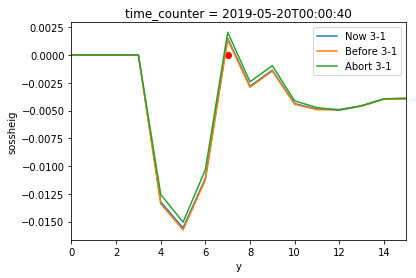

In [10]:
(sshn19[ib:ie,3]-sshn19[ib:ie, 1]).plot(label="Now 3-1")
(sshb19[ib:ie, 3]-sshb19[ib:ie, 1]).plot(label="Before 3-1")
(ssh20[ib:ie,3] - ssh20[ib:ie, 1]).plot(label="Abort 3-1")
plt.xlim(0, 15)
plt.scatter([392-ib], [0], color='r')
plt.legend();

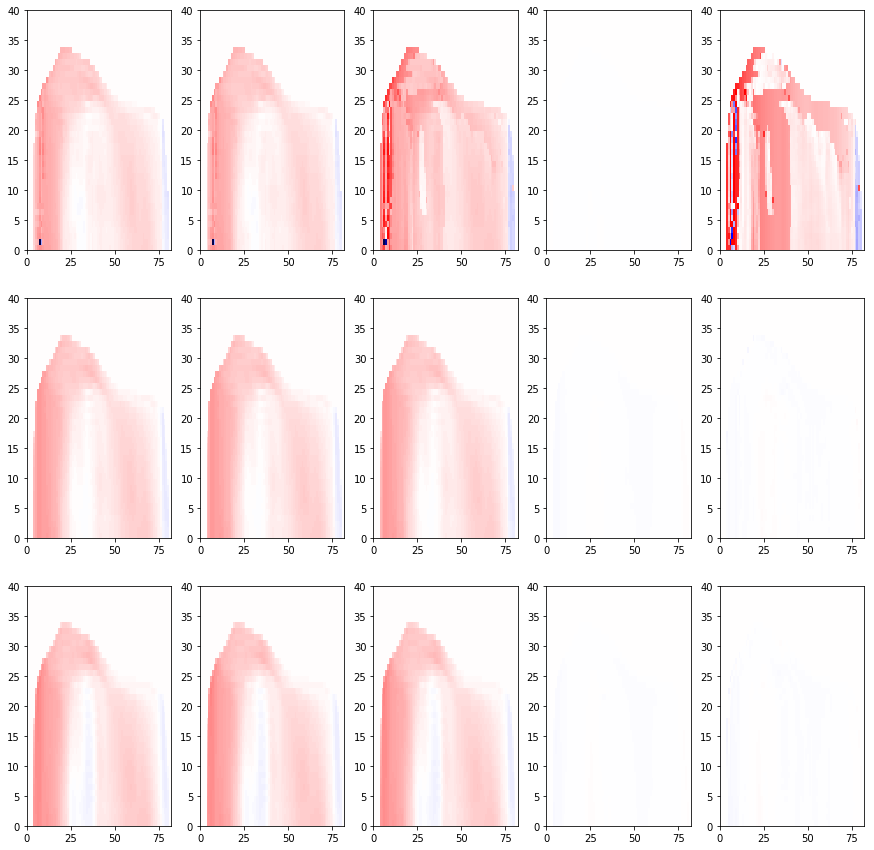

In [11]:
uveln19 = restart19.un[0]
uvelb19 = restart19.ub[0]
uvel20 = abort20.vozocrtx[0]
delta_vel1 = np.array(uvel20[0:40, ib:ie, 1]) - np.array(uveln19[0:40, ib:ie, 1])
delta_vel2 = np.array(uvel20[0:40, ib:ie, 2]) - np.array(uveln19[0:40, ib:ie, 2])
delta_vel3 = np.array(uvel20[0:40, ib:ie, 3]) - np.array(uveln19[0:40, ib:ie, 3])
fig, axs = plt.subplots(3, 5, figsize=(15, 15))
colour=axs[0, 0].pcolormesh(uvelb19[:, ib:ie, 1], label="Before 1", cmap='seismic', vmax=5, vmin=-5)
axs[0, 1].pcolormesh(uveln19[:, ib:ie, 1], label="After 1", cmap='seismic', vmax=5, vmin=-5)
axs[0, 2].pcolormesh(uvel20[:, ib:ie, 1], label="Abort", cmap='seismic', vmax=5, vmin=-5)
axs[0, 3].pcolormesh(uveln19[:, ib:ie, 1]-uvelb19[:, ib:ie, 1], label="Diff 1", cmap='bwr', vmax=1, vmin=-1)
axs[0, 4].pcolormesh(delta_vel1, label="Diff 2", cmap='bwr', vmax=1, vmin=-1)
axs[1, 0].pcolormesh(uvelb19[:, ib:ie, 2], label="Before 3", cmap='seismic', vmax=5, vmin=-5)
axs[1, 1].pcolormesh(uveln19[:, ib:ie, 2], label="After 3", cmap='seismic', vmax=5, vmin=-5)
axs[1, 2].pcolormesh(uvel20[:, ib:ie, 2], label="Abort 3", cmap='seismic', vmax=5, vmin=-5)
axs[1, 3].pcolormesh(uveln19[:, ib:ie, 2]-uvelb19[:, ib:ie, 2], label="Diff 1 at 3", cmap='bwr', vmax=0.2, vmin=-0.2)
axs[1, 4].pcolormesh(delta_vel2, label="Diff 2 at 3", cmap='bwr', vmax=0.2, vmin=-0.2);
axs[2, 0].pcolormesh(uvelb19[:, ib:ie, 3], label="Before 3", cmap='seismic', vmax=5, vmin=-5)
axs[2, 1].pcolormesh(uveln19[:, ib:ie, 3], label="After 3", cmap='seismic', vmax=5, vmin=-5)
axs[2, 2].pcolormesh(uvel20[:, ib:ie, 3], label="Abort 3", cmap='seismic', vmax=5, vmin=-5)
axs[2, 3].pcolormesh(uveln19[:, ib:ie, 3]-uvelb19[:, ib:ie, 3], label="Diff 1 at 3", cmap='bwr', vmax=0.2, vmin=-0.2)
axs[2, 4].pcolormesh(delta_vel3, label="Diff 2 at 3", cmap='bwr', vmax=0.2, vmin=-0.2);

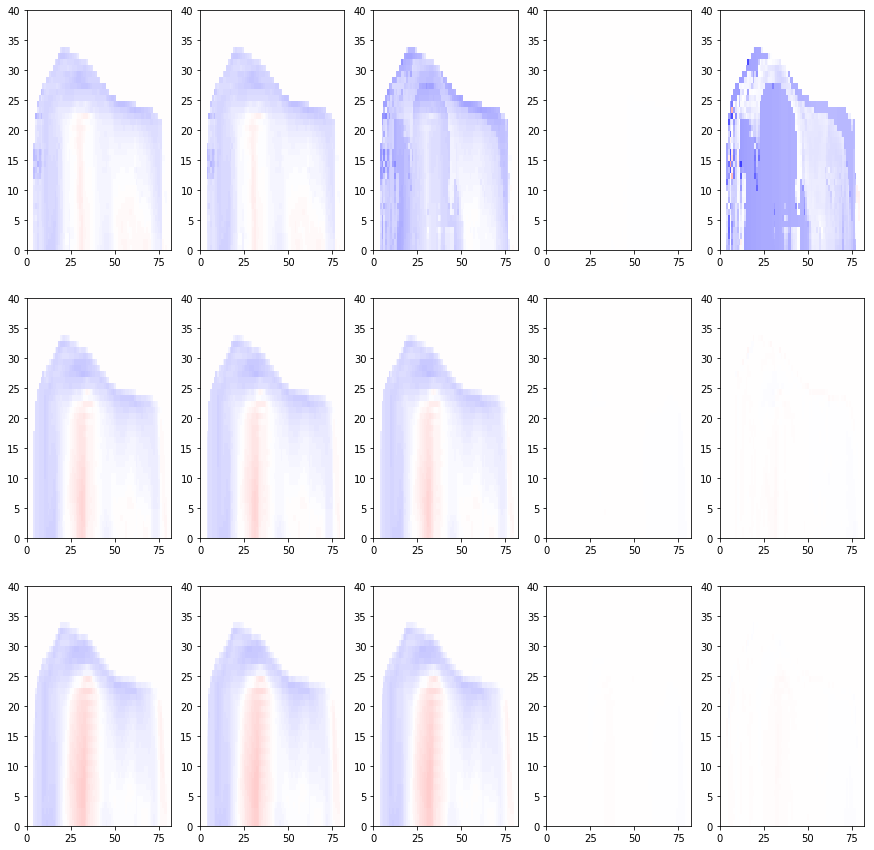

In [12]:
vveln19 = restart19.vn[0]
vvelb19 = restart19.vb[0]
vvel20 = abort20.vomecrty[0]
delta_vel1 = np.array(vvel20[0:40, ib:ie, 1]) - np.array(vveln19[0:40, ib:ie, 1])
delta_vel2 = np.array(vvel20[0:40, ib:ie, 2]) - np.array(vveln19[0:40, ib:ie, 2])
delta_vel3 = np.array(vvel20[0:40, ib:ie, 3]) - np.array(vveln19[0:40, ib:ie, 3])
fig, axs = plt.subplots(3, 5, figsize=(15, 15))
colour=axs[0, 0].pcolormesh(vvelb19[:, ib:ie, 1], label="Before 1", cmap='seismic', vmax=5, vmin=-5)
axs[0, 1].pcolormesh(vveln19[:, ib:ie, 1], label="After 1", cmap='seismic', vmax=5, vmin=-5)
axs[0, 2].pcolormesh(vvel20[:, ib:ie, 1], label="Abort", cmap='seismic', vmax=5, vmin=-5)
axs[0, 3].pcolormesh(vveln19[:, ib:ie, 1]-vvelb19[:, ib:ie, 1], label="Diff 1", cmap='bwr', vmax=1, vmin=-1)
axs[0, 4].pcolormesh(delta_vel1, label="Diff 2", cmap='bwr', vmax=1, vmin=-1)
axs[1, 0].pcolormesh(vvelb19[:, ib:ie, 2], label="Before 3", cmap='seismic', vmax=5, vmin=-5)
axs[1, 1].pcolormesh(vveln19[:, ib:ie, 2], label="After 3", cmap='seismic', vmax=5, vmin=-5)
axs[1, 2].pcolormesh(vvel20[:, ib:ie, 2], label="Abort 3", cmap='seismic', vmax=5, vmin=-5)
axs[1, 3].pcolormesh(vveln19[:, ib:ie, 2]-vvelb19[:, ib:ie, 2], label="Diff 1 at 3", cmap='bwr', vmax=0.2, vmin=-0.2)
axs[1, 4].pcolormesh(delta_vel2, label="Diff 2 at 3", cmap='bwr', vmax=0.2, vmin=-0.2);
axs[2, 0].pcolormesh(vvelb19[:, ib:ie, 3], label="Before 3", cmap='seismic', vmax=5, vmin=-5)
axs[2, 1].pcolormesh(vveln19[:, ib:ie, 3], label="After 3", cmap='seismic', vmax=5, vmin=-5)
axs[2, 2].pcolormesh(vvel20[:, ib:ie, 3], label="Abort 3", cmap='seismic', vmax=5, vmin=-5)
axs[2, 3].pcolormesh(vveln19[:, ib:ie, 3]-vvelb19[:, ib:ie, 3], label="Diff 1 at 3", cmap='bwr', vmax=0.2, vmin=-0.2)
axs[2, 4].pcolormesh(delta_vel3, label="Diff 2 at 3", cmap='bwr', vmax=0.2, vmin=-0.2);

In [13]:
restart19.un[0, :, :, 1] = restart19.un[0, :, :, 2]
restart19.ub[0, :, :, 1] = restart19.ub[0, :, :, 2]
restart19.vn[0, :, :, 1] = restart19.vn[0, :, :, 2]
restart19.vb[0, :, :, 1] = restart19.vb[0, :, :, 2]

In [14]:
restart19.attrs['Modified'] = 'copied velocity one away from west boundary to boundary'
restart19.attrs

OrderedDict([('file_name', 'SalishSea_03738960_restart.nc'),
             ('TimeStamp', '22/05/2019 15:53:46 -0700'),
             ('Modified',
              'copied velocity one away from west boundary to boundary')])

In [15]:
restart19.to_netcdf('SalishSea_03738960_restart.nc')

Smoothing the velocities out the rim did not help